In [171]:
import numpy as np
import matplotlib.pyplot as plt


In [172]:
import pandas as pd

In [173]:
mean_01=np.array([1,0.5])
cov_1=np.array([[1,0.1],[0.1,0.4]])
mean_02=np.array([5,5.5])
cov_02=np.array([[1.2,0.1],[0.1,1.3]])

In [174]:
dist_1=np.random.multivariate_normal(mean_01,cov_1,400)
dist_2=np.random.multivariate_normal(mean_02,cov_02,400)

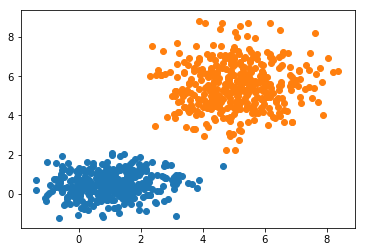

In [175]:
plt.scatter(dist_1[:,0],dist_1[:,1])
plt.scatter(dist_2[:,0],dist_2[:,1])

In [176]:
data1=np.zeros((400,1))
data2=np.ones((400,1))

In [177]:
dist_1=np.hstack((dist_1,data1))
dist_2=np.hstack((dist_2,data2))

In [178]:
data=np.vstack((dist_1,dist_2))

In [179]:
dist_1.shape

(400, 3)

In [180]:
dist_2.shape

(400, 3)

In [181]:
data.shape

(800, 3)

In [182]:
np.random.shuffle(data)
data_NEW=data[:,:-1]

In [183]:
#dataNormalise
u=np.mean(data_NEW,axis=0)
sigma=np.std(data_NEW,axis=0)
data_NEW=(data_NEW-u)/sigma

In [184]:
a=data[:,2].reshape((800,1))

In [185]:
np.hstack((data_NEW,a))

array([[ 1.61574683,  1.55990152,  1.        ],
       [ 0.03846118, -0.76240318,  0.        ],
       [-1.31680625, -0.6939084 ,  0.        ],
       ...,
       [-1.05433096, -0.8970238 ,  0.        ],
       [ 0.57677639,  1.0258282 ,  1.        ],
       [-0.57810554, -0.77086432,  0.        ]])

In [186]:
ones=np.ones((800,1))
final_data=np.hstack((ones,data))

In [187]:
final_data

array([[1.        , 6.74929014, 7.17897721, 1.        ],
       [1.        , 3.14638417, 0.97189446, 0.        ],
       [1.        , 0.05062208, 1.15496809, 0.        ],
       ...,
       [1.        , 0.65017981, 0.61207892, 0.        ],
       [1.        , 4.37602771, 5.75149989, 1.        ],
       [1.        , 1.73799507, 0.94927943, 0.        ]])

In [188]:
split=int(0.8*800)
print(split)

640


In [189]:
X_Train=final_data[:split,:-1]#640,3
Y_Train=final_data[:split,-1] #640,1
X_Test=final_data[split:,:-1] #160,3
Y_out=final_data[split:,-1]   #160,1
theta=np.zeros((X_Train.shape[1],1))
Y_Train=Y_Train.reshape((-1,1))

In [190]:
type(X_Train)

numpy.ndarray

In [191]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [192]:
def hypothesis(x,theta):
    return sigmoid(np.dot(x,theta))

In [193]:
theta.shape

(3, 1)

In [194]:
X_Train.shape

(640, 3)

In [205]:
def error(X,Y,theta):
    m=X.shape[0]
    error=0.0
    error_list=[]
    for i in range(m):
        y_hat=hypothesis(X[i],theta)
        error-=Y[i]*np.log2(y_hat)+(1-Y[i])*np.log2(1-y_hat)
        error_list.append(error)
    return error

In [206]:

def get_grad(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((theta.shape[0],1))
    for i in range(m):
        y_hat=hypothesis(X[i],theta)
        x=X[i].reshape((-1,1))
        grad-=((Y[i]-y_hat)*x)
    return grad/m

In [249]:
def theta_update(X,Y,lr=1,max_s=500):
    error_list=[]
    theta=np.zeros((X_Train.shape[1],1))
    for i in range(max_s):
        b=error(X_Train,Y_Train,theta)
        grad=get_grad(X_Train,Y_Train,theta)
        theta=theta-lr*grad #grad=diff of loss funciton = np.sum((y_hat-y[i])*X[i])
        error_list.append(b)
    return theta,error_list

In [250]:
A,B=theta_update(X_Train,Y_Train)

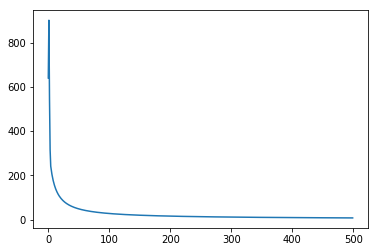

In [251]:
plt.plot(B)

/home/chirag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


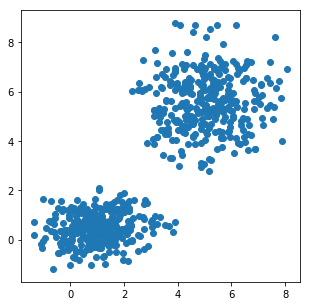

In [252]:
def drawLine():
    plt.figure(figsize=(5,5))
    x = np.linspace(-3,3,10)
    y = -(theta[0,0]*1 + theta[1,0]*x)/theta[2,0]
    plt.scatter(X_Train[:,1],X_Train[:,2])
    plt.plot(x,y)
    
    
drawLine()

In [100]:
X_Train.shape

(640, 3)

In [194]:
theta.shape

(3, 1)

In [196]:
np.dot(X_Train,theta).shape
    

(640, 1)

In [114]:
for i in range(X_Train.shape[0]):
        y_hat = hypothesis(X_Train[i],theta)
        x = X_Train[i].reshape((-1,1))
        grad += (Y_Train[i] - y_hat)*x
        

In [133]:
Y_Train.shape

(640, 1)

array([[1.        ],
       [5.75362644],
       [5.18049908]])